<a href="https://colab.research.google.com/github/kiseonjeong/keras-ml/blob/cnn-cifar10/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필기체 분류

In [1]:
# 기본 파라미터 설정
Nin = 784
Nh_l = [100, 50]
number_of_class = 10
Nout = number_of_class

In [2]:
from tensorflow.keras import layers, models

In [3]:
# 분류 DNN 모델 구현
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Nout):
        super().__init__()
        self.add(layers.Dense(Nh_l[0], activation='relu', input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(Nh_l[1], activation='relu', name='Hidden-2'))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
import numpy as np
from tensorflow.keras import datasets, utils

In [5]:
# 데이터 준비
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
L, W, H = X_train.shape
X_train = X_train.reshape(-1, W * H)
X_test = X_test.reshape(-1, W * H)
X_train = X_train / 255.0
X_test = X_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
# 분류 DNN 학습 및 성능 평가
model = DNN(Nin, Nh_l, Nout)
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)
performance_test = model.evaluate(X_test, y_test, batch_size=100)
print('Test Loss and Accuracy ->', performance_test)

Epoch 1/10
480/480 [==============================] - 5s 3ms/step - loss: 0.3595 - accuracy: 0.8996 - val_loss: 0.1747 - val_accuracy: 0.9500
Epoch 2/10
480/480 [==============================] - 1s 3ms/step - loss: 0.1480 - accuracy: 0.9564 - val_loss: 0.1319 - val_accuracy: 0.9625
Epoch 3/10
480/480 [==============================] - 1s 3ms/step - loss: 0.1057 - accuracy: 0.9686 - val_loss: 0.1115 - val_accuracy: 0.9662
Epoch 4/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0815 - accuracy: 0.9758 - val_loss: 0.1066 - val_accuracy: 0.9701
Epoch 5/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0653 - accuracy: 0.9809 - val_loss: 0.0979 - val_accuracy: 0.9694
Epoch 6/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0530 - accuracy: 0.9840 - val_loss: 0.0935 - val_accuracy: 0.9723
Epoch 7/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0437 - accuracy: 0.9869 - val_loss: 0.0949 - val_accuracy: 0.9722
Epoch 

# 컬러 이미지 분류

In [7]:
# 데이터 불러오기
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

    Y_train = utils.to_categorical(y_train)
    Y_test = utils.to_categorical(y_test)

    L, W, H, C = X_train.shape
    X_train = X_train.reshape(-1, W * H * C)
    X_test = X_test.reshape(-1, W * H * C)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

In [8]:
# DNN 모델링
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Pd_l, Nout):
        super().__init__()

        self.add(layers.Dense(Nh_l[0], activation='relu', input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dropout(Pd_l[0]))

        self.add(layers.Dense(Nh_l[1], activation='relu', input_shape=(Nin,), name='Hidden-2'))
        self.add(layers.Dropout(Pd_l[1]))

        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
%run 'drive/MyDrive/Colab Notebooks/Keras/skeras.ipynb'

In [10]:
import matplotlib.pyplot as plt

In [11]:
Nh_l = [100, 50]
Pd_l = [0.0, 0.0]
number_of_class = 10
Nout = number_of_class

(X_train, Y_train), (X_test, Y_test) = Data_func()
model = DNN(X_train.shape[1], Nh_l, Pd_l, Nout)
history = model.fit(X_train, Y_train, epochs=100, batch_size=100, validation_split=0.2)

performance_test = model.evaluate(X_test, Y_test, batch_size=100)
print('Test Loss and Accuracy ->', performance_test)

170500096/170498071 [==============================] - 4s 0us/step
Epoch 1/100
400/400 [==============================] - 2s 4ms/step - loss: 1.9414 - accuracy: 0.3002 - val_loss: 1.8197 - val_accuracy: 0.3527
Epoch 2/100
400/400 [==============================] - 1s 3ms/step - loss: 1.7713 - accuracy: 0.3677 - val_loss: 1.7650 - val_accuracy: 0.3619
Epoch 3/100
400/400 [==============================] - 1s 3ms/step - loss: 1.7043 - accuracy: 0.3857 - val_loss: 1.7243 - val_accuracy: 0.3847
Epoch 4/100
400/400 [==============================] - 1s 3ms/step - loss: 1.6682 - accuracy: 0.4015 - val_loss: 1.7001 - val_accuracy: 0.3929
Epoch 5/100
400/400 [==============================] - 1s 3ms/step - loss: 1.6399 - accuracy: 0.4135 - val_loss: 1.6435 - val_accuracy: 0.4174
Epoch 6/100
400/400 [==============================] - 1s 3ms/step - loss: 1.6160 - accuracy: 0.4235 - val_loss: 1.6388 - val_accuracy: 0.4223
Epoch 7/100
400/400 [==============================] - 1s 3ms/step - loss: 

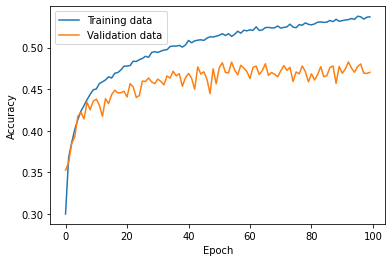

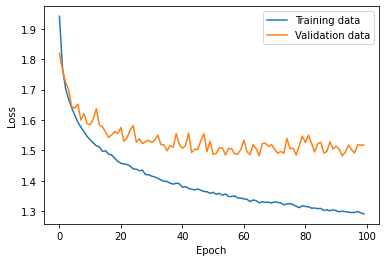

In [12]:
plot_acc(history)
plt.show()
plot_loss(history)
plt.show()

In [13]:
Nh_l = [100, 50]
Pd_l = [0.05, 0.5]
number_of_class = 10
Nout = number_of_class

(X_train, Y_train), (X_test, Y_test) = Data_func()
model = DNN(X_train.shape[1], Nh_l, Pd_l, Nout)
history = model.fit(X_train, Y_train, epochs=100, batch_size=100, validation_split=0.2)

performance_test = model.evaluate(X_test, Y_test, batch_size=100)
print('Test Loss and Accuracy ->', performance_test)

Epoch 1/100
400/400 [==============================] - 2s 3ms/step - loss: 2.1148 - accuracy: 0.2060 - val_loss: 1.9086 - val_accuracy: 0.3004
Epoch 2/100
400/400 [==============================] - 1s 3ms/step - loss: 1.9373 - accuracy: 0.2869 - val_loss: 1.8335 - val_accuracy: 0.3375
Epoch 3/100
400/400 [==============================] - 1s 3ms/step - loss: 1.8762 - accuracy: 0.3155 - val_loss: 1.8139 - val_accuracy: 0.3426
Epoch 4/100
400/400 [==============================] - 1s 3ms/step - loss: 1.8582 - accuracy: 0.3240 - val_loss: 1.7717 - val_accuracy: 0.3636
Epoch 5/100
400/400 [==============================] - 1s 3ms/step - loss: 1.8378 - accuracy: 0.3374 - val_loss: 1.7721 - val_accuracy: 0.3616
Epoch 6/100
400/400 [==============================] - 1s 3ms/step - loss: 1.8271 - accuracy: 0.3393 - val_loss: 1.7686 - val_accuracy: 0.3660
Epoch 7/100
400/400 [==============================] - 1s 3ms/step - loss: 1.8078 - accuracy: 0.3485 - val_loss: 1.7624 - val_accuracy: 0.3664

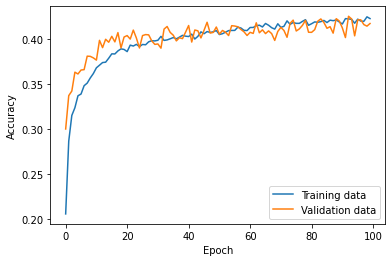

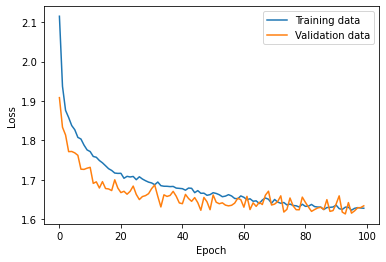

In [14]:
plot_acc(history)
plt.show()
plot_loss(history)
plt.show()